In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = 'data'

In [7]:
def read_data(filename):
    accelerometer = pd.read_csv(os.path.join(folder_path, filename, 'Accelerometer.csv'),sep=';')
    gyroscope = pd.read_csv(os.path.join(folder_path, filename,'Gyroscope.csv'),sep=';')
    accelerometer.rename(columns={'Acceleration x (m/s^2)':'accelerometer_x','Acceleration y (m/s^2)':'accelerometer_y','Acceleration z (m/s^2)':'accelerometer_z'}, inplace=True)
    gyroscope.rename(columns={'Acceleration x (m/s^2)':'gyroscope_x','Acceleration y (m/s^2)':'gyroscope_y','Acceleration z (m/s^2)':'gyroscope_z'}, inplace=True)

    accelerometer =accelerometer[int((len(accelerometer)*0.2)):int((len(accelerometer)*0.8))]
    gyroscope = gyroscope[int((len(gyroscope)*0.2)):int((len(gyroscope)*0.8))]
    accelerometer_mean = accelerometer.mean()
    gyroscope_mean = gyroscope.mean()
    return accelerometer, gyroscope , accelerometer_mean, gyroscope_mean

In [15]:
accelerometer_lucas2, gyroscope_lucas2, accelerometer_lucas2_mean, gyroscope_lucas2_mean = read_data('lucas1')
accelerometer_nick1, gyroscope_nick1, accelerometer_nick1_mean, gyroscope_nick1_mean = read_data('nick1')
accelerometer_till1, gyroscope_till1, accelerometer_till1_mean, gyroscope_till1_mean = read_data('till1')

In [29]:
t_stat, p_val = stats.ttest_ind([accelerometer_nick1['accelerometer_x'][:3000].mean(),accelerometer_nick1['accelerometer_x'][3000:].mean()],
                                [accelerometer_till1['accelerometer_x'][:3000].mean(),accelerometer_till1['accelerometer_x'][3000:].mean()]
                                )
# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


T-statistic: -3.4673390229517405
P-value: 0.0740564437914317


In [40]:
accelerometer_nick1['accelerometer_z'][:3000].mean(),accelerometer_nick1['accelerometer_z'][3000:].mean()          

(-1.0087812253865995, -0.825602090734511)

<Axes: ylabel='accelerometer_y'>

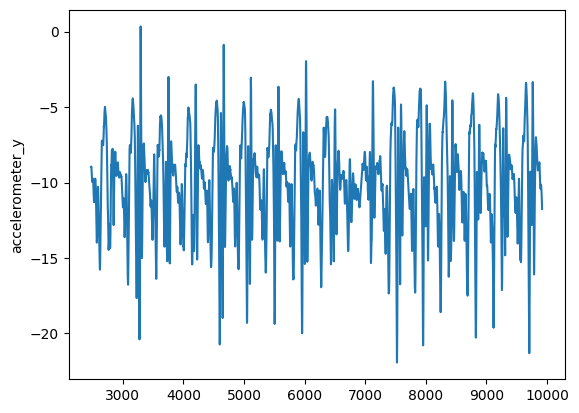

In [42]:
sns.lineplot(accelerometer_nick1['accelerometer_y'])